<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana8/EliminacionGaussiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
A = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
b = np.array([1.,3.,7.])

In [10]:
np.linalg.solve(A,b)

array([1., 1., 1.])

In [4]:
# Necesitamos llevar el sistema de ecuaciones a una triangular superior
# Los pivotes deben diferentes de 0: a través de intercambio de feliz

In [22]:
def TriangularSuperior(A,b=None):

  A = np.array(A, dtype=float, copy=True)
  n = A.shape[0]
  y = None if b is None else np.array(b, dtype=float, copy=True)

  for k in range(n):

    if A[k,k] == 0:
      raise ValueError("Error pivote")
    else:
      pivote = A[k,k]
      #print(pivote)
      for i in range(k+1,n):
        # Factor de elminacion
        m_ik = A[i,k] / pivote
        A[i, k:] = A[i, k:] - m_ik * A[k, k:]
        if y is not None:
          y[i] = y[i] - m_ik * y[k]


  return (A,y) if b is not None else A

In [23]:
U,y = TriangularSuperior(A,b)

In [24]:
U

array([[ 3.        , -1.        , -1.        ],
       [ 0.        ,  2.66666667,  0.66666667],
       [ 0.        ,  0.        ,  4.25      ]])

In [25]:
y

array([1.        , 3.33333333, 4.25      ])

In [32]:
def back_substitution(U,y):

  U = np.array(U, dtype=float, copy=True)
  y = np.array(y, dtype=float, copy=True)
  n = U.shape[0]
  x = np.zeros(n)

  #print(x)

  for i in reversed(range(n)):
    #print(i)
    suma = 0
    for j in range(i+1,n):
      suma += U[i,j]*x[j]

    x[i] = (y[i] - suma) / U[i,i]

  return x

In [33]:
back_substitution(U,y)

array([1., 1., 1.])

In [48]:
size = 10000
A = np.random.normal( loc= 0, scale= 3, size=(size,size))
b = np.random.normal( loc= 0, scale= 3, size=size)

In [49]:
#plt.imshow(A)

In [50]:
%time
x1 = np.linalg.solve(A,b)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [ ]:
%time
U,y = TriangularSuperior(A,b)
x2 = back_substitution(U,y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


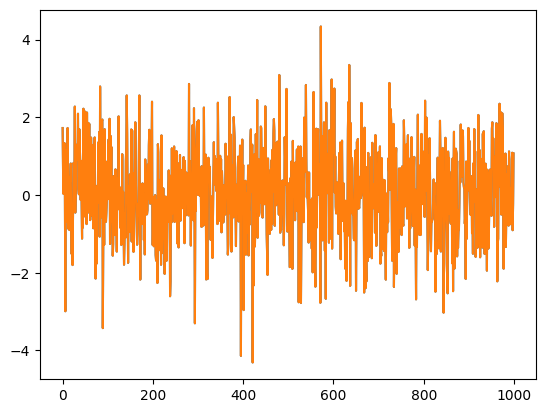

In [47]:
plt.plot(x1)
plt.plot(x2)